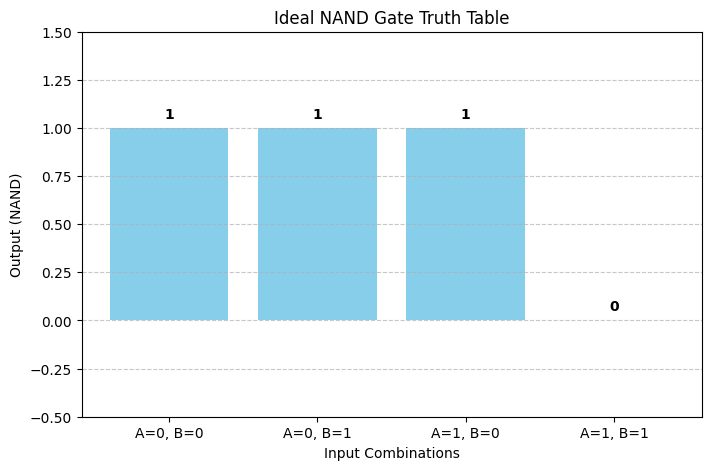

In [4]:
import matplotlib.pyplot as plt

# Define the input combinations and corresponding output values for an ideal NAND gate
inputs = ['A=0, B=0', 'A=0, B=1', 'A=1, B=0', 'A=1, B=1']
outputs = [1, 1, 1, 0]  # Expected outputs for each input combination

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(inputs, outputs, color='skyblue')

# Add labels and title
plt.xlabel('Input Combinations')
plt.ylabel('Output (NAND)')
plt.title('Ideal NAND Gate Truth Table')
plt.ylim(-0.5, 1.5)  # Set y-axis limits for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with the output value
for i, output in enumerate(outputs):
    plt.text(i, output + 0.05, str(output), ha='center', fontweight='bold')

# Display the plot
plt.show()


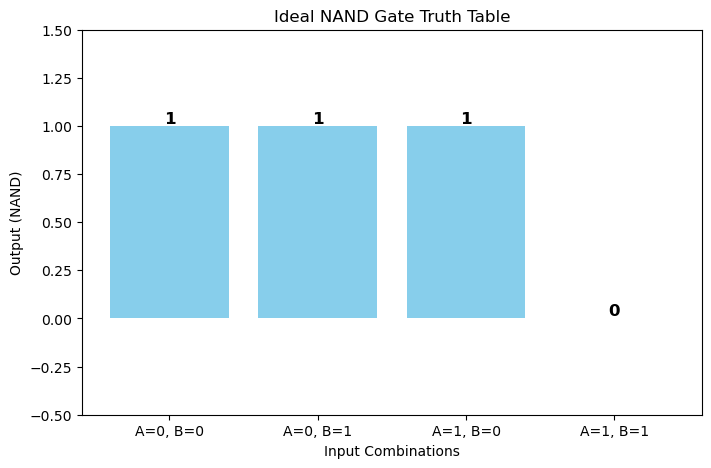

In [1]:
import matplotlib.pyplot as plt

# Data for NAND gate truth table
input_combinations = ['A=0, B=0', 'A=0, B=1', 'A=1, B=0', 'A=1, B=1']
nand_output = [1, 1, 1, 0]

# Plotting the truth table
plt.figure(figsize=(8, 5))
bars = plt.bar(input_combinations, nand_output, color='skyblue')
plt.ylim(-0.5, 1.5)
plt.ylabel("Output (NAND)")
plt.xlabel("Input Combinations")
plt.title("Ideal NAND Gate Truth Table")

# Annotate each bar with the output value
for bar, value in zip(bars, nand_output):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value}', 
             ha='center', va='bottom', fontweight='bold', fontsize=12)

# Save the plot as an image file
plt.savefig("nand_truth_table_graph.png")
plt.show()


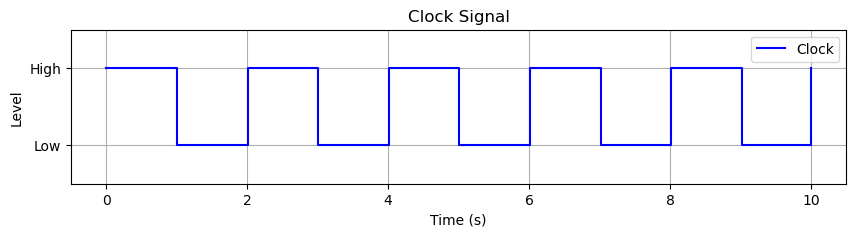

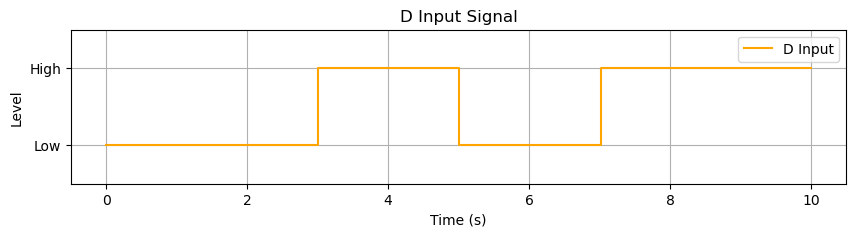

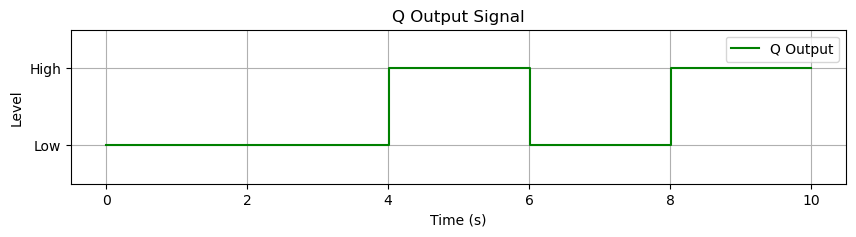

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define time array for the simulation
time = np.linspace(0, 10, 500)

# Define Clock signal - a square wave with positive edges
clock = np.where((time % 2) < 1, 1, 0)

# Define D input signal, changing just before each clock pulse for demonstration
d_input = np.where((time < 3) | ((time >= 5) & (time < 7)), 0, 1)

# Define Q output - follows D on the rising edge of the clock
q_output = np.zeros_like(time)
prev_q = 0
for i in range(1, len(time)):
    if clock[i-1] == 0 and clock[i] == 1:  # Rising edge detection
        prev_q = d_input[i]  # Q takes the value of D on rising edge
    q_output[i] = prev_q

# Plot each signal on its own graph

# Plot Clock signal
plt.figure(figsize=(10, 2))
plt.plot(time, clock, label="Clock", drawstyle='steps-post', color='blue')
plt.title("Clock Signal")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Plot D input signal
plt.figure(figsize=(10, 2))
plt.plot(time, d_input, label="D Input", drawstyle='steps-post', color='orange')
plt.title("D Input Signal")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Plot Q output signal
plt.figure(figsize=(10, 2))
plt.plot(time, q_output, label="Q Output", drawstyle='steps-post', color='green')
plt.title("Q Output Signal")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Show plots
plt.show()


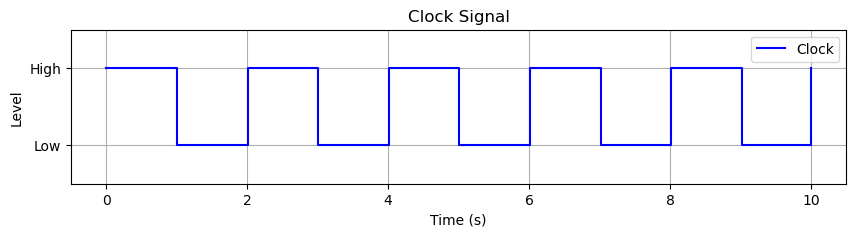

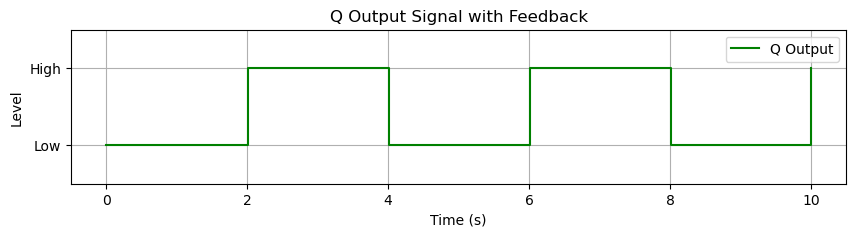

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define time array for simulation
time = np.linspace(0, 10, 500)

# Define Clock signal - square wave for toggling
clock = np.where((time % 2) < 1, 1, 0)

# Define Q output toggling on each clock rising edge
q_output = np.zeros_like(time)
prev_q = 0
for i in range(1, len(time)):
    if clock[i-1] == 0 and clock[i] == 1:  # Rising edge detection
        prev_q = 1 - prev_q  # Toggle Q output
    q_output[i] = prev_q

# Plot Clock signal
plt.figure(figsize=(10, 2))
plt.plot(time, clock, label="Clock", drawstyle='steps-post', color='blue')
plt.title("Clock Signal")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Plot Q output signal
plt.figure(figsize=(10, 2))
plt.plot(time, q_output, label="Q Output", drawstyle='steps-post', color='green')
plt.title("Q Output Signal with Feedback")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Show plots
plt.show()


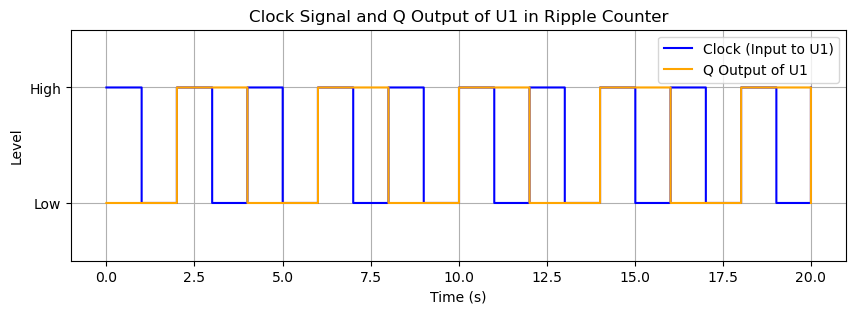

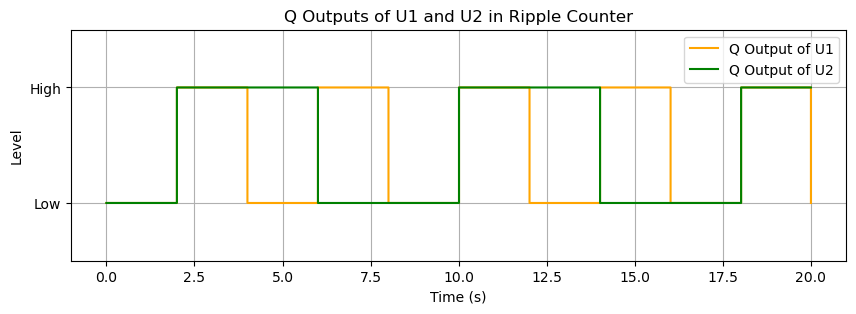

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define time array for simulation
time = np.linspace(0, 20, 1000)  # Extended time for two flip-flops

# Define Clock signal - square wave for U1
clock = np.where((time % 2) < 1, 1, 0)

# Define Q output of U1 toggling on each clock rising edge
q_u1 = np.zeros_like(time)
prev_q_u1 = 0
for i in range(1, len(time)):
    if clock[i-1] == 0 and clock[i] == 1:  # Rising edge detection for U1
        prev_q_u1 = 1 - prev_q_u1  # Toggle U1's Q output
    q_u1[i] = prev_q_u1

# Define Q output of U2 toggling on each rising edge of Q output from U1
q_u2 = np.zeros_like(time)
prev_q_u2 = 0
for i in range(1, len(time)):
    if q_u1[i-1] == 0 and q_u1[i] == 1:  # Rising edge detection for U2 (Clock = Q_U1)
        prev_q_u2 = 1 - prev_q_u2  # Toggle U2's Q output
    q_u2[i] = prev_q_u2

# Plot Clock signal and Q output of U1
plt.figure(figsize=(10, 3))
plt.plot(time, clock, label="Clock (Input to U1)", drawstyle='steps-post', color='blue')
plt.plot(time, q_u1, label="Q Output of U1", drawstyle='steps-post', color='orange')
plt.title("Clock Signal and Q Output of U1 in Ripple Counter")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Plot Q outputs of U1 and U2
plt.figure(figsize=(10, 3))
plt.plot(time, q_u1, label="Q Output of U1", drawstyle='steps-post', color='orange')
plt.plot(time, q_u2, label="Q Output of U2", drawstyle='steps-post', color='green')
plt.title("Q Outputs of U1 and U2 in Ripple Counter")
plt.xlabel("Time (s)")
plt.ylabel("Level")
plt.ylim(-0.5, 1.5)
plt.yticks([0, 1], ["Low", "High"])
plt.grid(True)
plt.legend()

# Show plots
plt.show()
